In [ ]:
import pickle

#imgs und gts
imgs_20xRenamed = []
with open('save_data/3D_images_Renamed/imgs_20xRenamed.pkl', 'rb') as f:
    imgs_20xRenamed = pickle.load(f)
gt_3D_relabelled = []
with open('save_data/gt_relabeled/gt_3D_relabelled.pkl', 'rb') as f:
    gt_3D_relabelled = pickle.load(f)

#masken
masks3D = []
with open('save_data/masks/masks3D.pkl', 'rb') as f:
    masks3D = pickle.load(f)
masks3D_nnUNet_Instances = []
with open('save_data/masks/masks3D_nnUNet_Instances_relabeled.pkl', 'rb') as f:
    masks3D_nnUNet_Instances = pickle.load(f)
masks3D_Deepcell = []
with open('save_data/masks/masks3D_Deepcell.pkl', 'rb') as f:
    masks3D_Deepcell = pickle.load(f)
masks3D_20xRenamed = []
with open('save_data/masks/20xRenamed/masks3D_CELLPOSE_RUN_1.pkl', 'rb') as f:
    masks3D_20xRenamed = pickle.load(f)
masks_LabelingApp = []
with open('Labeling_App/helpers/masks3D_CELLPOSE_RUN_1_Quadrants.pkl', 'rb') as f:
    masks_LabelingApp = pickle.load(f)
normalized_channels = []
with open('Labeling_App/helpers/normalized_channels.pkl', 'rb') as f:
    normalized_channels = pickle.load(f)

masks_LabelingApp_r = []
with open('Labeling_App/helpers/Aufteilung_Labeling_App/rüdiger/masks3D_CELLPOSE_RUN_1_Quadrants.pkl', 'rb') as f:
    masks_LabelingApp_r = pickle.load(f)
normalized_channels_r = []
with open('Labeling_App/helpers/Aufteilung_Labeling_App/rüdiger/normalized_channels.pkl', 'rb') as f:
    normalized_channels_r = pickle.load(f)

for i, gt in enumerate(gt_3D_relabelled):
    if masks3D[i].shape != gt.shape:
        print(masks3D[i].shape)
    if masks3D_nnUNet_Instances[i].shape != gt.shape:
        print(masks3D_nnUNet_Instances[i].shape)    

#Labels And IoUs
best_IoUs_3D_Cellpose = []
with open('save_data/LabelsAndIoUs/best_IoUs_3D_Cellpose.pkl', 'rb') as f:
    best_IoUs_3D_Cellpose = pickle.load(f)
best_labels_3D_Cellpose = []
with open('save_data/LabelsAndIoUs/best_labels_3D_Cellpose.pkl', 'rb') as f:
    best_labels_3D_Cellpose = pickle.load(f)

best_IoUs_3D_nnU = []
with open('save_data/LabelsAndIoUs/best_IoUs_3D_nnU.pkl', 'rb') as f:
    best_IoUs_3D_nnU = pickle.load(f)
best_labels_3D_nnU = []
with open('save_data/LabelsAndIoUs/best_labels_3D_nnU.pkl', 'rb') as f:
    best_labels_3D_nnU = pickle.load(f)

best_IoUs_3D_Deepcell = []
with open('save_data/LabelsAndIoUs/best_IoUs_3D_Deepcell.pkl', 'rb') as f:
    best_IoUs_3D_Deepcell = pickle.load(f)
best_labels_3D_Deepcell = []
with open('save_data/LabelsAndIoUs/best_labels_3D_Deepcell.pkl', 'rb') as f:
    best_labels_3D_Deepcell = pickle.load(f)


In [9]:
print(len(normalized_channels_r))
print(normalized_channels_r[0].shape)
print(masks_LabelingApp[0].shape)

2
(63, 1024, 1024, 4)
(28, 1024, 1024)


In [5]:
print(len(imgs_20xRenamed))

22


In [2]:
img = masks3D_20xRenamed[5]
print(img.shape)

(17, 1024, 1024)


(29, 4, 1024, 1024)


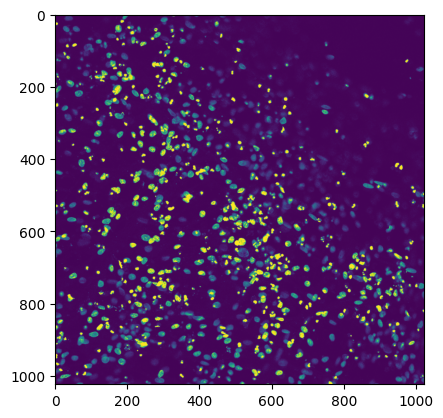

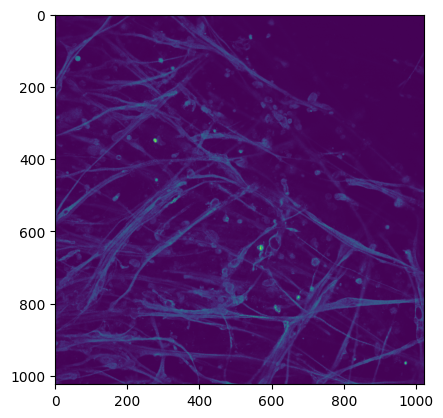

In [10]:
import matplotlib.pyplot as plt
from scipy.ndimage import label
from skimage.measure import regionprops
import numpy as np

img = imgs_20xRenamed[1]
print(img.shape)
plt.imshow(img[12,0,:,:])
plt.show()
plt.imshow(img[12,1,:,:])
plt.show()
plt.imsave('my_test.png', img[12,1,:,:], cmap='gray')
plt.imsave('nc_test.png', img[12,0,:,:], cmap='gray')

#binary = img[8,:,:] >= 1
#plt.imshow(binary)
#plt.show()
#labeled, _ = label(binary)
#props = regionprops(labeled)#

#sizes = [prop.area for prop in props]  
#print(np.average(sizes))
#diameters = [np.cbrt(p.area) for p in props]  
#print(np.average(diameters))
#diameters = [np.sqrt(p.area) for p in props]
#print(np.average(diameters))

In [ ]:
#import re
#import os
#import tifffile as tif
#
#imgs_20xRenamed = []
#save_dir = "20xRenamed/20xRenamed"
#image_ext = ".tif"
## Get all .tif files
#image_files = [file for file in os.listdir(save_dir) if file.endswith(image_ext) if file.startswith('img')]
#
#def extract_number(filename):
#    match = re.match(r"img_(\d+)\.tif", filename)
#    return int(match.group(1)) if match else float('inf')
#
#image_files_sorted = sorted(image_files, key=extract_number)
#
## Load images in sorted order
#for file in image_files_sorted:
#    img = tif.imread(os.path.join(save_dir, file))
#    print(f"image shape {img.shape} in {file}")
#    imgs_20xRenamed.append(img)

In [ ]:
from Labeling_App.helpers.blob_data_helper import BlobDataHelper
blb = BlobDataHelper()

In [44]:
import importlib
import Labeling_App.helpers.blob_data_helper
importlib.reload(Labeling_App.helpers.blob_data_helper)

from Labeling_App.helpers.blob_data_helper import BlobDataHelper, get_next_undef
blb = BlobDataHelper()


In [ ]:
#print(np.unique(masks3D_20xRenamed[3])) ->2128
import matplotlib.pyplot as plt
import numpy as np
slice = 3
bbox, blob_index, image_index, edge_blob, inside_box = blb.get_blob(image_index=0, blob_index=7)
print(inside_box)
print(bbox.shape)
print(edge_blob)
if 3 > bbox.shape[0]:
    slice = bbox.shape[0] - 1
if 1 == bbox.shape[0]:
    slice = 0
plt.imshow(bbox[slice,:,:])
plt.show()

In [142]:
import importlib
import Labeling_App.helpers.visualization_helper
importlib.reload(Labeling_App.helpers.visualization_helper)

from Labeling_App.helpers.visualization_helper import plot_image_with_clustered_contours_RGB

In [143]:
import importlib
import helpers.features_helper
importlib.reload(helpers.features_helper)

from helpers.features_helper import extract_features_and_contours, cluster_features
import numpy as np

In [ ]:
image_index = 13
slice = 15
mask = masks3D_20xRenamed[image_index][slice,:,:]
img = imgs_20xRenamed[image_index][slice, 0:2, :, :]
print(img.shape)
img_reshaped = img.transpose(1, 2, 0) 
print(img_reshaped.shape)
img_rgb = np.concatenate([img_reshaped.astype(np.uint8), np.zeros((1024, 1024, 1), dtype=np.uint8)], axis=2)
print(img_rgb.shape)

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img_rgb[:,:,:])
plt.axis("off")
plt.show()

In [118]:
contours_with_features = extract_features_and_contours(mask)

In [147]:
contours_with_classes = cluster_features(contours_with_features, k=3)

511
511


In [ ]:
print("Available labels:", list(contours_with_features.keys()))


In [ ]:
label = 25
#print("Combined contour points for label", label)
#print(contours_with_features[label]['contours'])

# Print the features list
print(f"the {len(contours_with_classes[label]['features'])} Features for label {label}")
print(contours_with_classes[label]['features'])
print(f"make it class: {contours_with_classes[label]['class']}")

contour = contours_with_classes[label]['contours']

plt.plot(contour[:, 1], contour[:, 0], '-o')  # X=cols, Y=rows
plt.gca().invert_yaxis()  # Optional: to match image coordinates
plt.title(f'Contour for label {label}')
plt.axis('equal')
plt.show()
plt.imshow(mask == label)
plt.show()

In [ ]:
plot_image_with_clustered_contours_RGB(img_rgb, contours_with_classes=contours_with_classes)


In [ ]:
blobs_per_image = [len(np.unique(mask)) for mask in masks3D_20xRenamed]

In [ ]:
print(len(blobs_per_image))
print(blobs_per_image[0])

In [69]:
import json, os
def label_all_img0(blob_count):
    label_store = {"img0": {str(i): 1 for i in range(1, blob_count + 1)}}
    with open("label_store.json", "w") as f:
        json.dump(label_store, f, indent=2)
label_all_img0(2375)

In [ ]:
SAVE_FILE = "label_store.json"
SAVE_INTERVAL = 3
save_counter = 0
# ---- Load Label Store ----
if os.path.exists(SAVE_FILE):
    with open(SAVE_FILE, 'r') as f:
        label_store = json.load(f)
    print(get_next_undef(label_store))

In [ ]:
all_shapes = []
for k in range(len(masks3D_20xRenamed)):
    print(f"***************** IMAGE {k} *****************")
    shapes = []
    length = len(np.unique(masks3D_20xRenamed[k]))
    for i in range(1, length):
        if i % 100 == 0:
            print(f"iteration {i} von {length}")
        bbox, blob_index, image_index, edge_blob = blb.get_blob(image_index=0, blob_index=i, offset=0)
        if not edge_blob:
            shapes.append(bbox.shape)
    all_shapes.append(shapes)

In [33]:
import pickle 
with open('all_shapes.pkl', 'wb') as handle:
    pickle.dump(all_shapes, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [ ]:
import numpy as np

for idx, shape_list in enumerate(all_shapes):
    x_sizes = [shape[1] for shape in shape_list]
    y_sizes = [shape[2] for shape in shape_list]

    x_sizes = np.array(x_sizes)
    y_sizes = np.array(y_sizes)

    top5_x = np.sort(x_sizes)[-5:][::-1]
    top5_y = np.sort(y_sizes)[-5:][::-1]

    mean_x = np.mean(x_sizes)
    mean_y = np.mean(y_sizes)

    print(f"Shape List {idx}:")
    print("  Top 5 X sizes:", top5_x)
    print("  Top 5 Y sizes:", top5_y)
    print("  Mean X size:", mean_x)
    print("  Mean Y size:", mean_y)
    print()


In [ ]:
import importlib
import Labeling_App.helpers.blob_data_helper
importlib.reload(Labeling_App.helpers.blob_data_helper)
from Labeling_App.helpers.blob_data_helper import sort_cells_by_position, get_quadrant_cutoffs, BlobDataHelper, normalize_channel
from Labeling_App.helpers.visualization_helper import normalize_with_cutoffs

In [38]:
#(sorted_msks, mapping_msks) = sort_cells_by_position()
cutoffs = get_quadrant_cutoffs(mapping_msks)
import pickle 
with open('quadrant_cutoffs.pkl', 'wb') as handle:
    pickle.dump(cutoffs, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [58]:

print(cutoffs[0]['Q1_max'])


594


In [ ]:
import matplotlib.pyplot as plt
blb = BlobDataHelper()

bbox, blob_index, image_index, edge_blob, inside_box = blb.get_blob(0,594, selected_channels=[1])
full_image, (x_min_abs, x_max_abs, y_min_abs, y_max_abs, z_min, z_max) = blb.get_fullscreen_for_current_blob(1)
print(np.max(full_image))
plt.imshow(normalize_with_cutoffs(full_image, 3, 97))
plt.show()
#plt.imshow(bbox[1,:,:,:])
#plt.show()
bbox, blob_index, image_index, edge_blob, inside_box = blb.get_blob(0,594, selected_channels=[2])
full_image, (x_min_abs, x_max_abs, y_min_abs, y_max_abs, z_min, z_max) = blb.get_fullscreen_for_current_blob(1)
plt.imshow(normalize_with_cutoffs(full_image, 3, 97))
plt.show()
#plt.imshow(bbox[1])
#plt.show()
bbox, blob_index, image_index, edge_blob, inside_box = blb.get_blob(0,594, selected_channels=[1,2])
full_image, (x_min_abs, x_max_abs, y_min_abs, y_max_abs, z_min, z_max) = blb.get_fullscreen_for_current_blob(1)
plt.imshow(normalize_with_cutoffs(full_image, 3, 97))
plt.show()
#plt.imshow(bbox[1])
#plt.show()

In [ ]:
import importlib
import Labeling_App.helpers.blob_data_helper
importlib.reload(Labeling_App.helpers.blob_data_helper)
from Labeling_App.helpers.blob_data_helper import sort_cells_by_position, get_quadrant_cutoffs, BlobDataHelper, normalize_channel
normalized_channels = []
i= 0
for full_img in imgs_20xRenamed:
    print(f"preprocessing image {i}")
    i+=1
    ch0 = normalize_channel(full_img[:, 0, :, :])
    ch1 = normalize_channel(full_img[:, 1, :, :])
    ch2 = normalize_channel(full_img[:, 2, :, :])
    ch3 = normalize_channel(full_img[:, 3, :, :])

    # Stack into shape: (Z, X, Y, C) for fast slicing later
    img = np.stack([ch0, ch1, ch2, ch3], axis=-1)  # shape: (Z, X, Y, 4)
    normalized_channels.append(img)


In [14]:
print(len(normalized_channels))

22


In [13]:
import pickle 
with open('normalized_channels.pkl', 'wb') as handle:
    pickle.dump(normalized_channels, handle, protocol=pickle.HIGHEST_PROTOCOL)